<a href="https://colab.research.google.com/github/Prakruthir12/California-Housing-Price-Prediction/blob/main/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

**Loading the dataset**

In [ ]:
df_house = pd.read_excel("/content/housing.xlsx")

In [ ]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
print("The number of rows and columns are {}".format(df_house.shape))

The number of rows and columns are (20640, 10)


In [ ]:
print("Column names are \n {}".format(df_house.columns))

Column names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


In [ ]:
df_house.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

**Handle missing values**

In [ ]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**Replace null values with mean**

In [ ]:
df_house["total_bedrooms"].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [ ]:
df_house['total_bedrooms'].fillna(value = df_house['total_bedrooms'].mean(), inplace=True)
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**Visualization**

<Figure size 640x480 with 0 Axes>

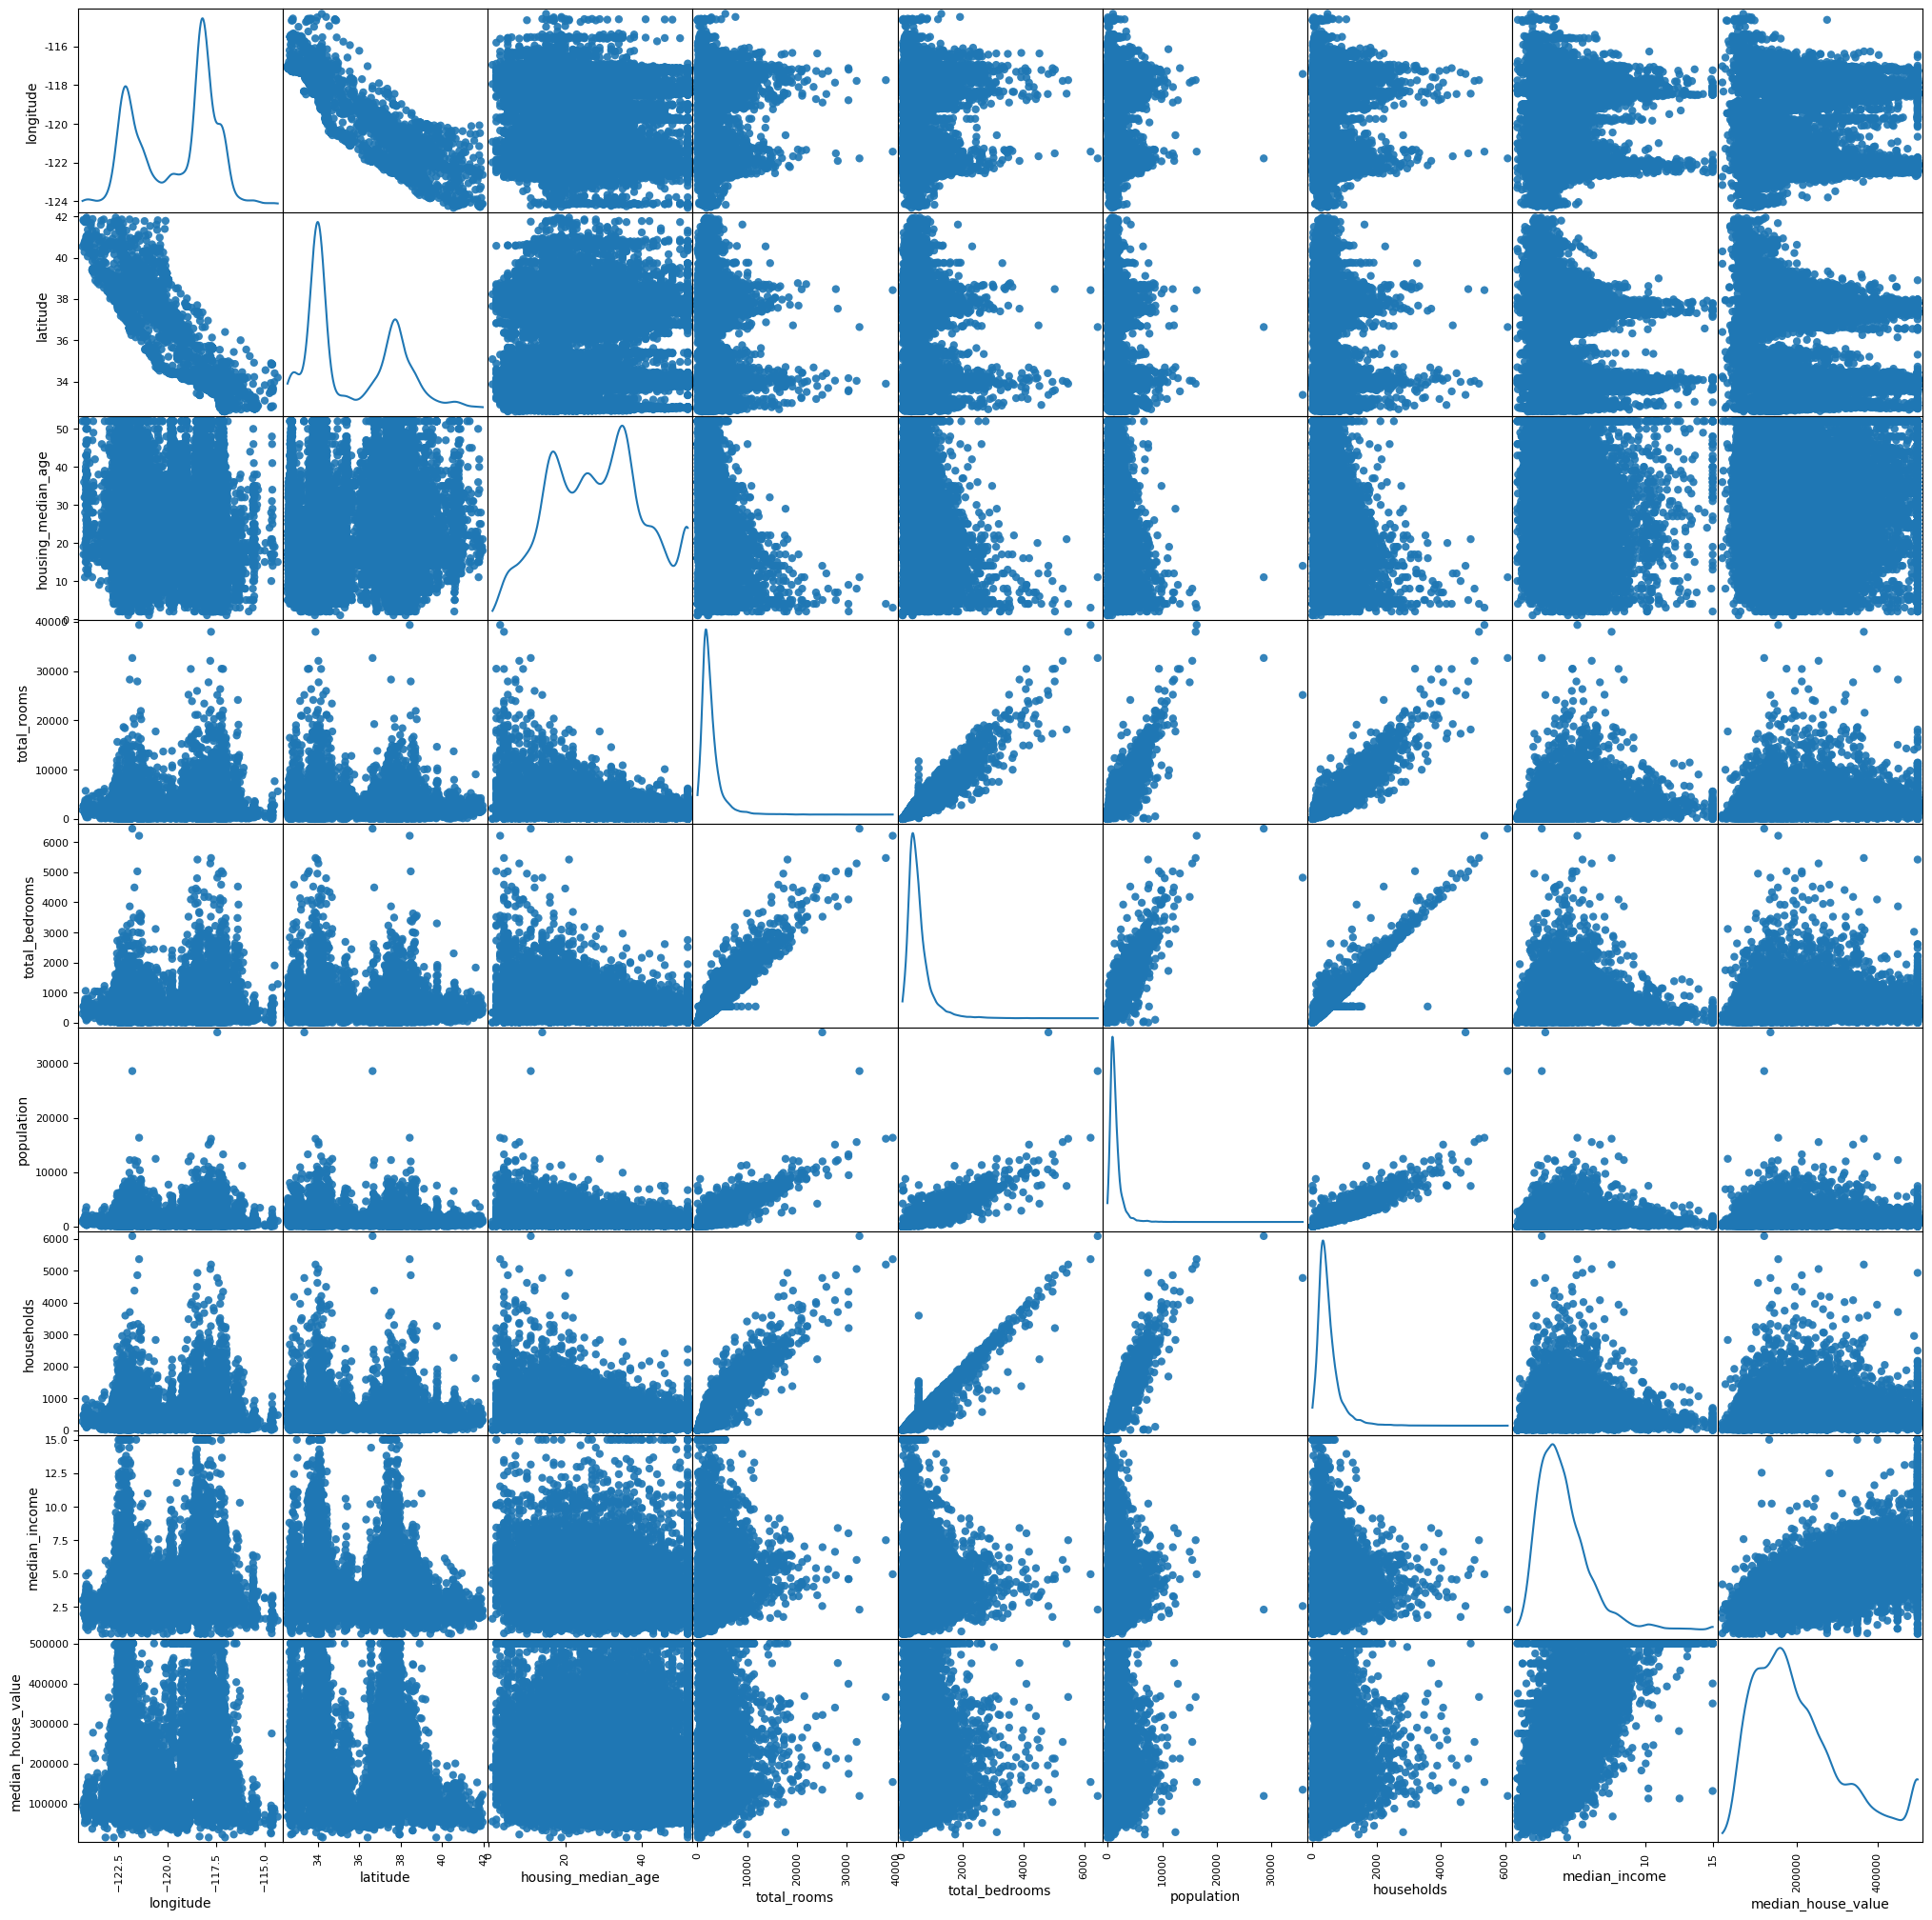

In [ ]:
fig = plt.figure()
scatter_matrix(df_house,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

In [ ]:
fig = px.scatter_mapbox(df_house,lat='latitude',lon='longitude',color='median_house_value',hover_name='ocean_proximity',
                        size='population',mapbox_style="stamen-terrain",zoom=5,size_max=25)
fig.show()

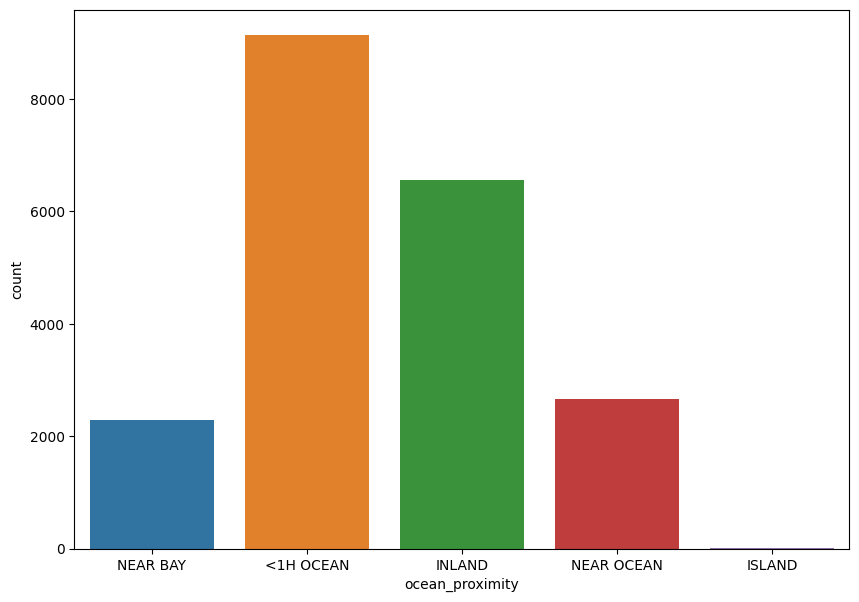

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df_house,x='ocean_proximity')
plt.show()

**Convert categorical column in the dataset to numerical data**

In [ ]:
le = LabelEncoder()
print(df_house["ocean_proximity"].value_counts())
df_house["ocean_proximity"]=le.fit_transform(df_house["ocean_proximity"])
print(df_house["ocean_proximity"].value_counts())
df_house.describe()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


**Standardize data**

In [ ]:
# Get column names
names = df_house.columns

# Create the scaler object
scaler = StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_house)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


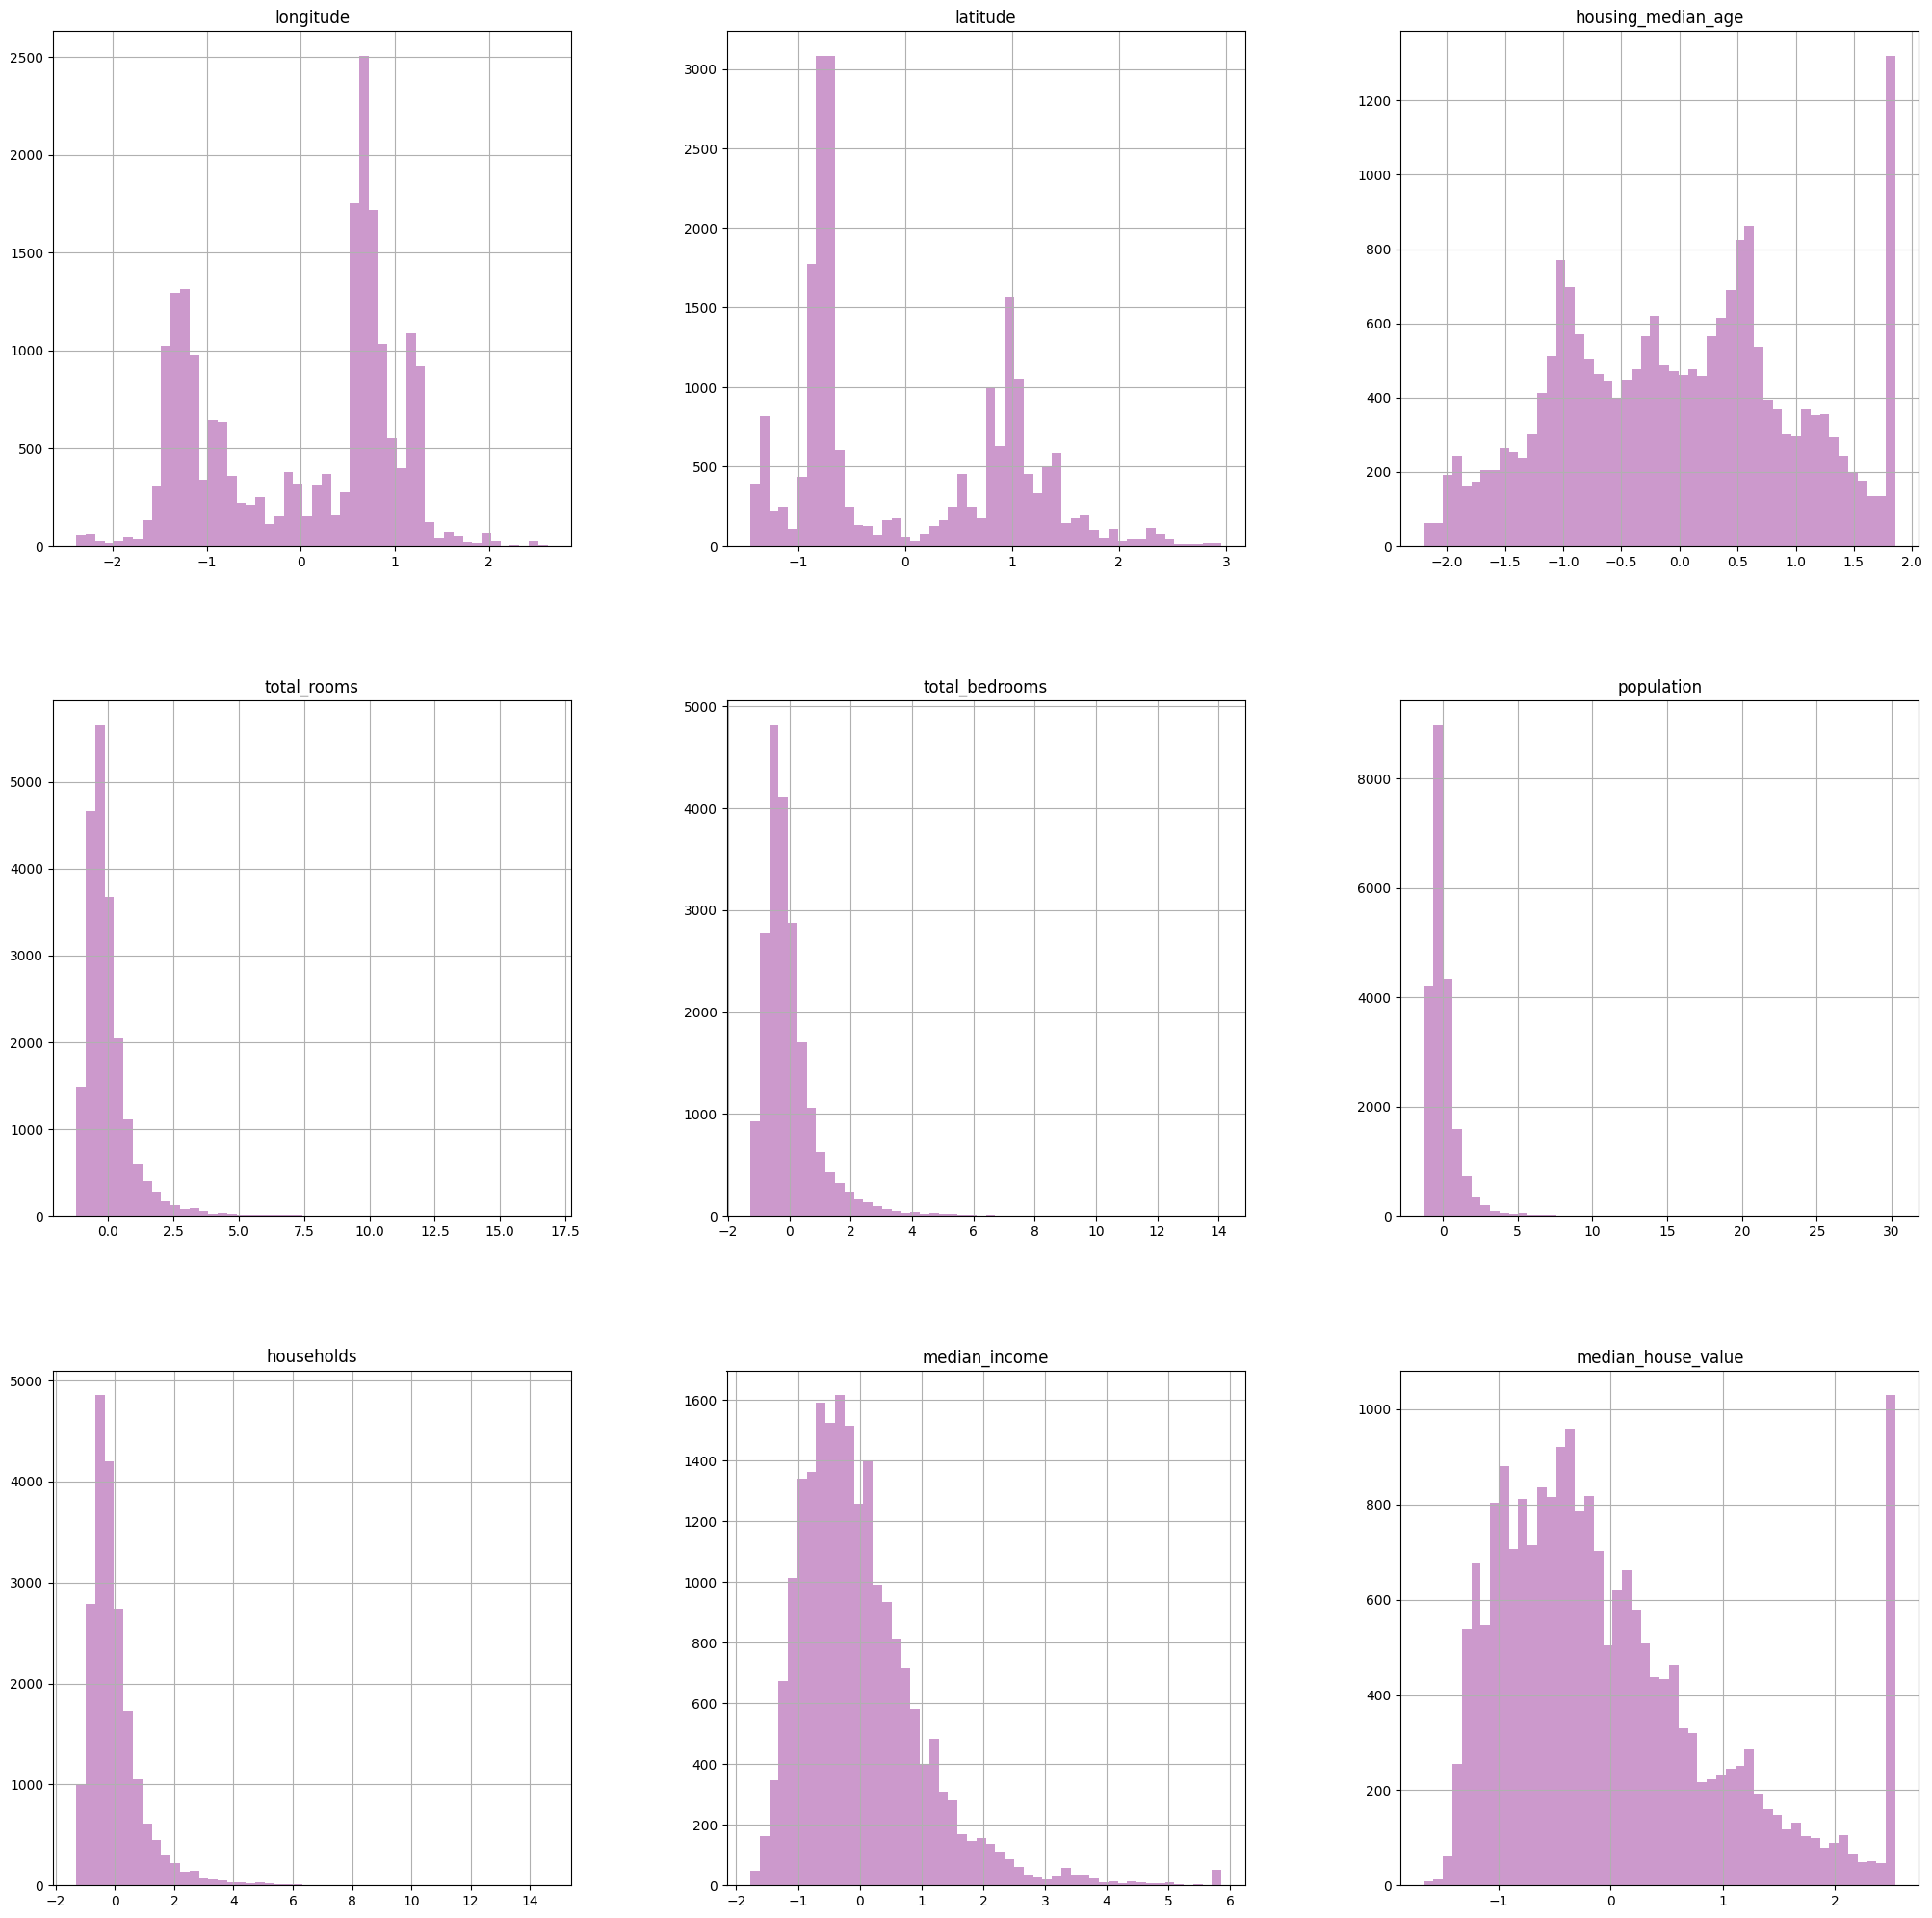

In [ ]:
scaled_df.drop("ocean_proximity", axis=1).hist(figsize=(25,25), bins=50, color="purple", alpha=0.4);

**Check for Outliers**

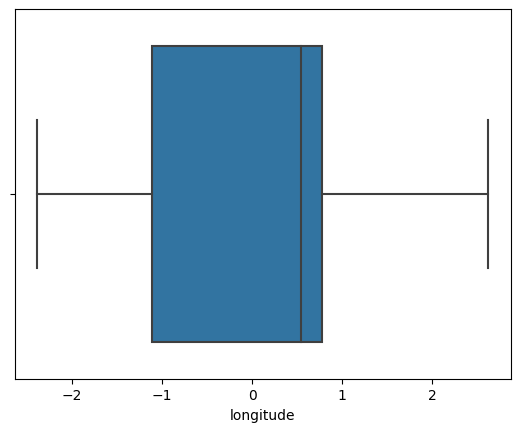

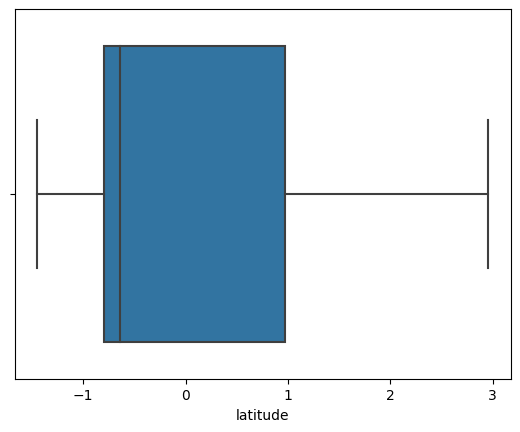

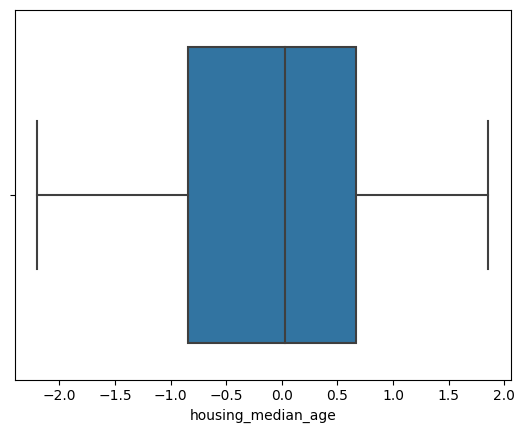

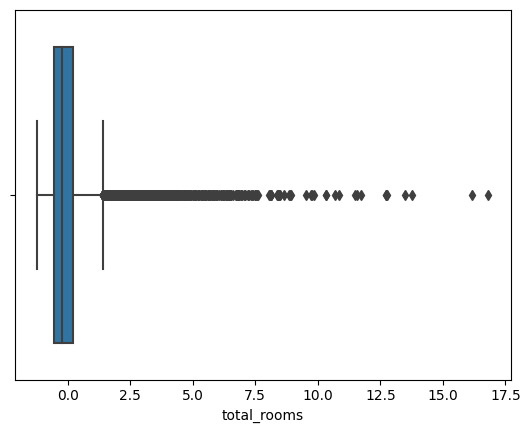

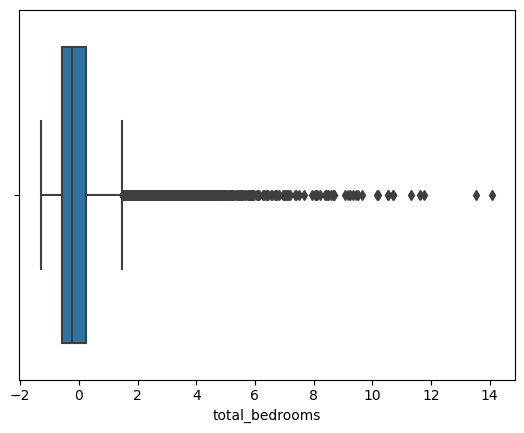

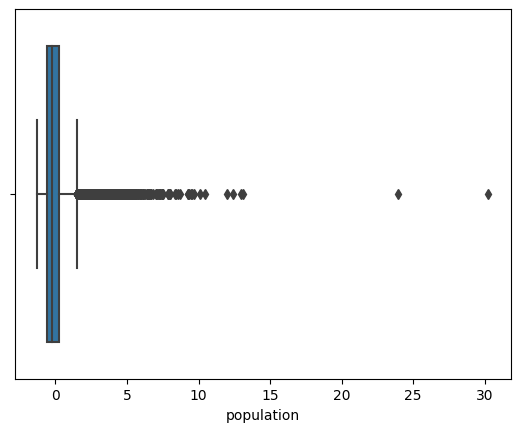

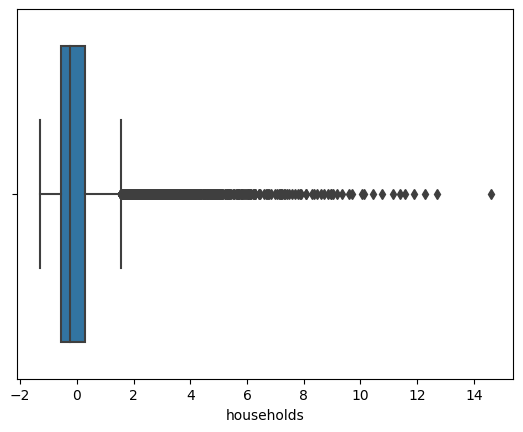

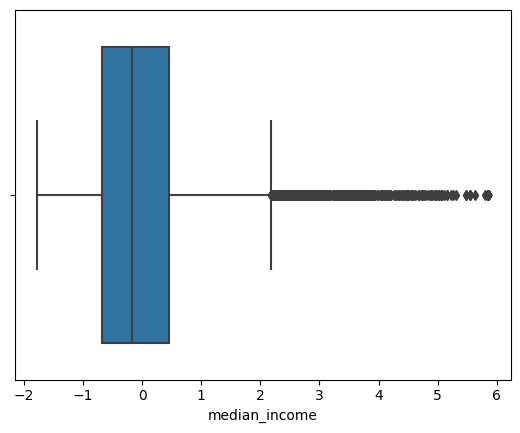

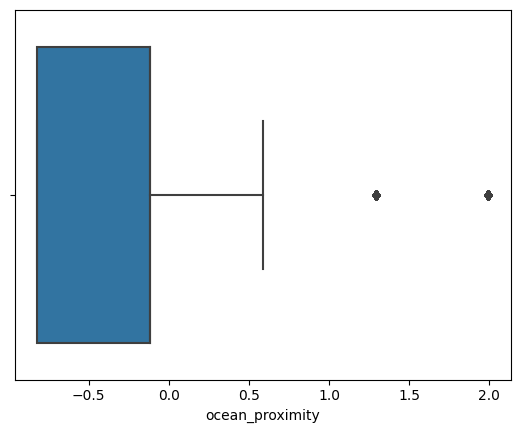

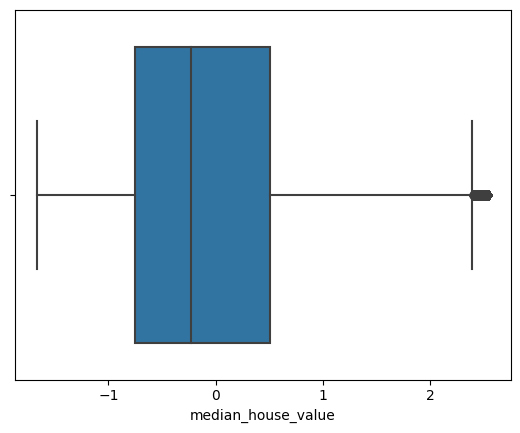

In [ ]:
for column in scaled_df:
  plt.figure()
  sns.boxplot(x=scaled_df[column])

**Extract input (X) and output (Y) data from the dataset**

In [ ]:
X_features = ['longitude', 'latitude','housing_median_age','total_rooms',
              'total_bedrooms','population','households','median_income',
              'ocean_proximity']
X=scaled_df[X_features]
Y=scaled_df['median_house_value']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
print(scaled_df.shape)
print(X.shape)
print(Y.shape)

(20640, 10)
(20640, 9)
(20640,)


**Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


### **Apply various Algorithm**

**Linear Regression**

In [ ]:
# Linear Regression on training data

linreg = LinearRegression()
linreg.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [ ]:
# predict output for test dataset using fitted model

y_predict = linreg.predict(x_test)

In [ ]:
# RMSE from linear Regression

print(sqrt(mean_squared_error(y_test, y_predict)))
print((r2_score(y_test, y_predict)))

0.6056598120301221
0.6276223517950296


**Decision Tree Regression**

In [ ]:
# Decision Tree Regression on training data

dtreg = DecisionTreeRegressor()
dtreg.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse')

In [ ]:
# predict output for test dataset using fitted model

y_predict = dtreg.predict(x_test)

In [ ]:
# Print RMSE from Decision Tree Regression

print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.5959440591621769
0.6394735938434155


**Random Forest Regression**

In [ ]:
# Random Forest Regression on training data

rfreg = RandomForestRegressor()
rfreg.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features='auto', n_estimators=10)

In [ ]:
# predict output for test dataset using fitted model

y_predict = rfreg.predict(x_test)

In [ ]:
# Print RMSE from Decision Tree Regression

print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.42611131412117625
0.8156801019975131


**Hypothesis testing ad P values**

In [ ]:
lm=smf.ols(formula='median_house_value ~ longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income+ocean_proximity',data=scaled_df).fit()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        15:04:22   Log-Likelihood:                -18868.
No. Observations:               20640   AIC:                         3.776e+04
Df Residuals:                   20630   BIC:                         3.783e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.469e-17      0.004  -8.26e-15      1.000      -0.008       0.008
longitude             -0.7393      0.013    -57.263      0.000      -0.765      -0.714
latitude              -0.7858      0.013    -61.664      0.000      -0.811      -0.761
housing_median_age     0.1248      0.005     26.447      0.000       0.116       0.134
total_rooms           -0.1265      0.015     -8.609      0.000      -0.155      -0.098
total_bedrooms         0.2995      0.022     13.630      0.000       0.256       0.343
population            -0.3907      0.011    -36.927      0.000      -0.411      -0.370
households             0.2589      0.022     11.515      0.000       0.215       0.303
median_income          0.6549      0.005    119.287      0.000       0.644       0.666
ocean_proximity        0.0009      0.005      0.190      0.850      -0.008       0.010
==============================================================================
Omnibus:                     5037.491   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18953.000
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.054   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression with one independent variable**

In [ ]:
# Extract median_income column from X_train and X_test
x_train_income = x_train['median_income'].values.reshape(-1, 1)
x_test_income = x_test['median_income'].values.reshape(-1, 1)

# Fit linear regression model
linreg = LinearRegression()
linreg.fit(x_train_income, y_train)

# Predict output for test dataset
y_train_predict = linreg.predict(x_train_income)
y_test_predict = linreg.predict(x_test_income)

**Visualize relationship between features**

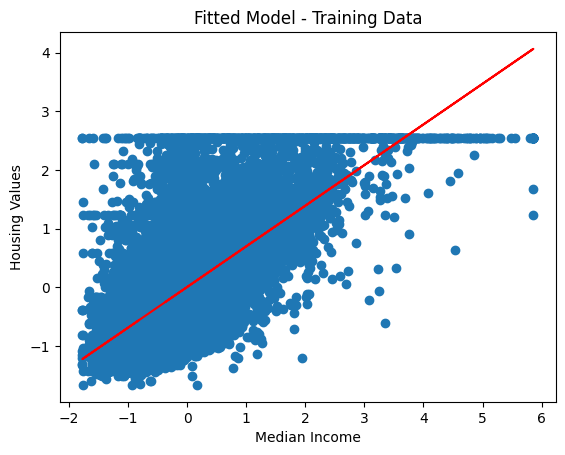

In [ ]:
# Plot fitted model for training data
plt.scatter(x_train_income, y_train)
plt.plot(x_train_income, y_train_predict, color='red')
plt.xlabel('Median Income')
plt.ylabel('Housing Values')
plt.title('Fitted Model - Training Data')
plt.show()



**Hypothesis testing ad P values**

In [ ]:
lm=smf.ols(formula='median_house_value ~ median_income',data=scaled_df).fit()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        15:04:22   Log-Likelihood:                -22668.
No. Observations:               20640   AIC:                         4.534e+04
Df Residuals:                   20638   BIC:                         4.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.735e-16      0.005   3.43e-14      1.000      -0.010       0.010
median_income     0.6881      0.005    136.223      0.000       0.678       0.698
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P value is 0.000 indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

so, there is a strong relationship between median_house_value and median_income